<a href="https://colab.research.google.com/github/pardeep0161/DataVizFall2020_Colab/blob/master/Class_Activity_Lec03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize New York times database for COVID-19
## Case study Bristol and Suffolk, MA

## Loading US County Level Data

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# https://github.com/nytimes/covid-19-data repository location
db = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
## loading data into dataframe
df = pd.read_csv(db)
df['date'] = df['date'].astype('datetime64[ns]') 

# Explore data

In [17]:
df.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [18]:
## ADD CODE HERE (1)
df.nunique()

date        234
county     1923
state        55
fips       3205
cases     16026
deaths     2381
dtype: int64

In [19]:
# let us get fips for 2 counties  (Bristol and Suffolk, MA)
## fips stands for : Federal Information Processing Standards
##- ADD CODE HERE (2)
Bristol_fips = df.loc[lambda df: (df['county'] == 'Bristol') & (df['state'] == 'Massachusetts'),'fips'].unique()[0]
Suffolk_fips = df.loc[lambda df: (df['county'] == 'Suffolk') & (df['state'] == 'Massachusetts'),'fips'].unique()[0]
# Suffolk_fips = df[(df['county'] == "Suffolk")]
print("Bristol_fips = ", Bristol_fips)
print("Suffolk_fips = ", Suffolk_fips)
# Suffolk_fips

Bristol_fips =  25005.0
Suffolk_fips =  25025.0


In [20]:
# ADD CODE HERE - (3)
def get_county_stat(df, county_fip):
  county_stats = df.loc[lambda df: (df['fips'] == county_fip),['date','county','state','cases','deaths']].set_index('date')
  return county_stats
get_county_stat(df,Bristol_fips).head()

,county,state,cases,deaths
date,,,,
2020-03-14,Bristol,Massachusetts,1,0
2020-03-15,Bristol,Massachusetts,1,0
2020-03-16,Bristol,Massachusetts,2,0
2020-03-17,Bristol,Massachusetts,5,0
2020-03-18,Bristol,Massachusetts,5,0


## Explore data type

In [21]:
df_Bristol = get_county_stat(df,25005)
df_Suffolk = get_county_stat(df,25025)

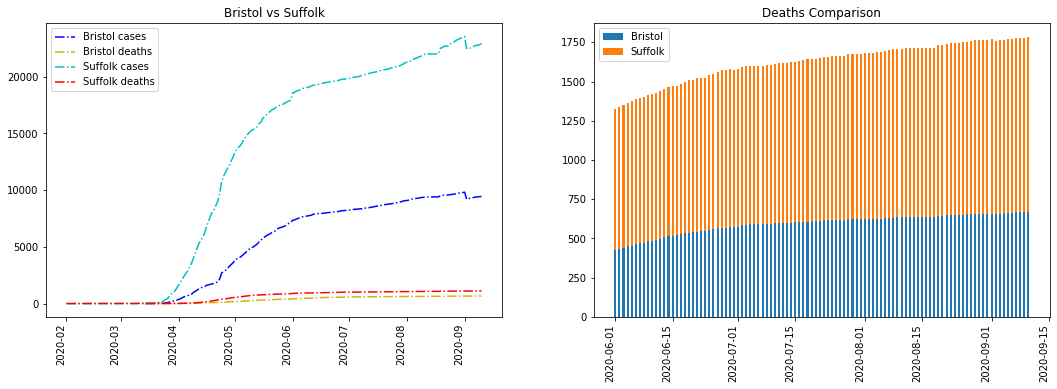

In [22]:
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

f,ax = plt.subplots(1,2,figsize=(18,6))
# ADD CODE HERE - (4)
ax[0].plot(df_Bristol.index, df_Bristol.cases, 'b-.', label = 'Bristol cases')
ax[0].plot(df_Bristol.index, df_Bristol.deaths, 'y-.', label = 'Bristol deaths')
ax[0].plot(df_Suffolk.index, df_Suffolk.cases, 'c-.', label = 'Suffolk cases')
ax[0].plot(df_Suffolk.index, df_Suffolk.deaths, 'r-.', label = 'Suffolk deaths')
ax[0].legend()
ax[0].set_title('Bristol vs Suffolk')

df_bristol_deaths = df_Bristol.loc[lambda df: df.index >= '2020-06-01', ['deaths']]
df_Suffolk_deaths = df_Suffolk.loc[lambda df: df.index >= '2020-06-01', ['deaths']]

ax[1].bar(df_bristol_deaths.index, df_bristol_deaths.deaths, width = 0.5, label = 'Bristol')
ax[1].bar(df_Suffolk_deaths.index, df_Suffolk_deaths.deaths, bottom = df_bristol_deaths.deaths, width = 0.5, label = 'Suffolk')
ax[1].legend()
ax[1].set_title("Deaths Comparison")
f.autofmt_xdate(rotation= 90)


## Top 10 counties by number of cases and deaths 



```
# This is formatted as code
```





In [23]:
# counties_cases_deaths = df.groupby(['county','state'])['cases'].sum()
# counties_cases_deaths.head(285)
latest_date = df['date'].max()
counties_cases_deaths = df.loc[lambda df: df['date'] == latest_date, ['county', 'state', 'fips', 'cases', 'deaths']].set_index('county')
counties_cases_deaths[['state','cases']].sort_values(by='cases',ascending= False).head(10)

,state,cases
county,,
Los Angeles,California,251024
New York City,New York,241686
Miami-Dade,Florida,162893
Maricopa,Arizona,136571
Cook,Illinois,132966
Harris,Texas,113504
Dallas,Texas,77948
Broward,Florida,73869
Clark,Nevada,61871


In [24]:
counties_cases_deaths[['state','deaths']].sort_values(by = 'deaths', ascending= False).head(10)

,state,deaths
county,,
New York City,New York,23741
Los Angeles,California,6128
Cook,Illinois,5103
Maricopa,Arizona,3133
Wayne,Michigan,2941
Miami-Dade,Florida,2789
Harris,Texas,2363
Nassau,New York,2199
Essex,New Jersey,2121


## Death rate Per FIPS 

In [25]:
counties_cases_deaths['death_rate'] = (counties_cases_deaths['deaths']/counties_cases_deaths['cases']) *100

In [26]:
counties_cases_deaths[['fips','death_rate']]

,fips,death_rate
county,,
Autauga,1001.0,1.554404
Baldwin,1003.0,0.951790
Barbour,1005.0,0.891720
Bibb,1007.0,1.515152
Blount,1009.0,0.839161
...,...,...
Sweetwater,56037.0,0.626959
Teton,56039.0,0.220751
Uinta,56041.0,0.645161


## <font color = red> Bonus Point</font>

### A function that makes "Folium Choropleth Map" for Weekly Cases, Weekly Deaths and Weekly Mortality Rate </font>

ALL COUNTIES

<br>

### def Folium_Choropleth(type = 'cases',date=''):

<br>

## Due for Bonus point : Friday (09/11/2020 11:59pm)

In [33]:
import folium
from folium import plugins
from datetime import timedelta
import json

In [56]:
def Folium_Choropleth(type,date_str):
  dt = datetime.strptime(date_str, '%Y-%m-%d')
  # seven_date_before = dt - timedelta(days = 7)
  start = dt - timedelta(days=dt.weekday()) - timedelta(days=3)
  end = start + timedelta(days=7)

  # Perform weekly selection on data
  weekly_df = df[(df['date'] >= start) & (df['date'] <= end)].copy()
  weekly_df.sort_values(by=['fips', 'date'], inplace=True)

  # Convert FLoat type fips into str without decimals
  # weekly_df['fips'] = weekly_df['fips'].fillna(0)
  weekly_df.dropna(subset = ['fips'], inplace=True)
  weekly_df['fips'] = weekly_df['fips'].astype(int)
  weekly_df['fips'] = weekly_df['fips'].astype(str)

  # Perfom Aggregation for weekly_data
  weekly_df['daily_cases'] = weekly_df.groupby('fips')['cases'].diff()
  weekly_df['daily_cases'] = weekly_df['daily_cases'].rolling(window = 3).max()
  weekly_df['daily_cases'] = weekly_df['daily_cases'].fillna(0)
  # weekly_df[weekly_df['dail_case'] < 0] = 0
  weekly_df['daily_deaths'] = weekly_df.groupby('fips')['deaths'].diff()
  weekly_df['daily_deaths'] = weekly_df['daily_deaths'].rolling(window = 3).max()
  weekly_df['daily_deaths'] = weekly_df['daily_deaths'].fillna(0)
  # weekly_df[weekly_df['daily_deaths'] < 0] = 0
  weekly_df = weekly_df.groupby('fips').sum()

  # print(weekly_df)

  ## Daily Cases Plot
  # weekly_df = df[df['date'] == dt]
  # weekly_df = weekly_df[['fips','cases']]
  # print(weekly_df.head(10))
  
  if type == 'cases':
    weekly_df = pd.DataFrame(data = {'fips' : weekly_df.index, 'weekly_cases' : weekly_df['daily_cases']})
    column = 'weekly_cases'
    legend_name='Weekly Cases'
  elif type == 'deaths':
    weekly_df = pd.DataFrame(data = {'fips' : weekly_df.index, 'weekly_deaths' : weekly_df['daily_deaths']})
    column = 'weekly_deaths'
    legend_name = 'Weekly Deaths'
  elif type == 'mortality':
    weekly_df = pd.DataFrame(data = {'fips' : weekly_df.index, 'weekly_mortality' : weekly_df['deaths']*100/weekly_df['cases']})
    column = 'weekly_mortality'
    legend_name = 'Weekly Mortality Rate'
    
 

  county_geo = r'https://raw.githubusercontent.com/python-visualization/folium/master/tests/us-counties.json'

  map = folium.Map(
      location=[37, -102],
      zoom_start=3
  )
  folium.Choropleth(
    geo_data=county_geo,
    name='choropleth',
    data=weekly_df,
    columns=['fips', column],
    key_on='feature.id',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name= start.strftime("%Y-%m-%d") + " - " + end.strftime("%Y-%m-%d") + " " + legend_name
  ).add_to(map)
  
  folium.LayerControl().add_to(map)
  return map

Folium_Choropleth('cases','2020-09-09')

In [ ]:

      


    # elif type == 'deaths':
      # weekly_df['deaths_diff'] = np.nan
      # weekly_df.diff[idx] = weekly_df.deaths[idx].diff()